Normal likelihoods and normal-inverse-gamma priors
Today we explore how samples from a normal-inverse-gamma (NIG) distribution can be interpreted as normal distributions. Each sample from the NIG distribution specifies the mean and variance of a normal distribution.

This is related to the fact that the NIG distribution is a conjugate prior for the normal likelihood function. In fact, a sample from any conjugate prior can be interpreted as the likelihood function corresponding to that prior.

Normal-inverse-gamma in SciPy
Even though SciPy does have classes defined for the normal distribution (scipy.stats.norm) and the inverse-gamma distribution (scipy.stats.invgamma), it does not have one defined for the normal-inverse-gamma distribution. To help you, the functions below implement the pdf and a sampler for the normal-inverse-gamma distribution.

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
'''
Function definitions for the normal-inverse-gamma distribution. The parameters
of the distribution, namely mu, lambda / nu, alpha, beta, are as defined here:

  https://en.wikipedia.org/wiki/Normal-inverse-gamma_distribution

Note that we use the symbol nu (ν) rather than lambda (λ) for the third parameter.
This is to match the notation used in the conjugate priors table on Wikipedia:

  https://en.wikipedia.org/wiki/Conjugate_prior#Table_of_conjugate_distributions
'''

def norminvgamma_pdf(x, sigma2, mu, nu, alpha, beta):
    '''
    The probability density function of the normal-inverse-gamma distribution at
    x (mean) and sigma2 (variance).
    '''
    return (
        stats.norm.pdf(x, loc=mu, scale=np.sqrt(sigma2 / nu)) *
        stats.invgamma.pdf(sigma2, a=alpha, scale=beta))

def norminvgamma_rvs(mu, nu, alpha, beta, size=1):
    '''
    Generate n samples from the normal-inverse-gamma distribution. This function
    returns a (size x 2) matrix where each row contains a sample, (x, sigma2).
    '''
    sigma2 = stats.invgamma.rvs(a=alpha, scale=beta, size=size)  # Sample sigma^2 from the inverse-gamma
    x = stats.norm.rvs(loc=mu, scale=np.sqrt(sigma2 / nu), size=size)  # Sample x from the normal
    return np.vstack((x, sigma2)).transpose()


Task 1
Generate 10 samples from the normal-inverse-gamma distribution with parameters as provided below. Each sample corresponds to the mean and variance of a normal distribution.

With these hyperparameters the prior 95% confidence interval for the mean is about [-10, 10] and for the variance [0.1, 10]. In practice you would work the other way around: use confidence intervals to determine values for the prior hyperparameters.

Plot the 10 normal distributions corresponding to your 10 samples. To see the functions clearly, plot your graphs on the domain [-15, 15].

You should see that the 10 samples (normal distributions) are all quite different. This means the prior is quite broad (uncertain) over the mean and variance.

In [65]:
# Normal-inverse-gamma prior hyperparameters
mu_0 = 0        # The prior mean is centered around 0.
nu_0 = 0.054    # The smaller nu_0 is, the more uncertain we are about the prior mean.
alpha_0 = 1.12  # alpha and beta govern the marginal prior over the variance.
beta_0 = 0.4

In [66]:
#10 samples --> mean and variance of normal distribution
norminvgamma_rvs(mu_0, nu_0, alpha_0, beta_0, size=10)

array([[  1.72044595,   1.3459858 ],
       [ -1.26163916,   0.2653253 ],
       [ -3.28530251,   0.79976441],
       [ -2.43727958,   0.45877943],
       [-14.17999369,   1.60348349],
       [ -5.07549819,   2.8873881 ],
       [ -0.3784864 ,   0.40190185],
       [ -3.42419843,   0.18719971],
       [  0.44292728,   0.1172097 ],
       [ -2.74596869,   0.09580205]])

In [67]:
#With these hyperparameters the prior 95% confidence interval for the mean is about [-10, 10]
#and for the variance [0.1, 10]. In practice you would work the other way around: use 
#confidence intervals to determine values for the prior hyperparameters.

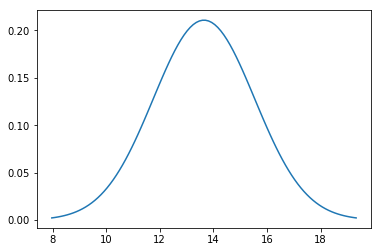

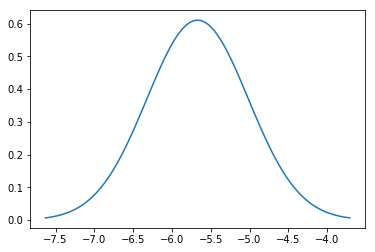

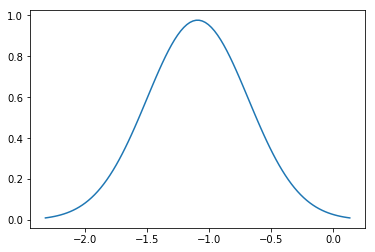

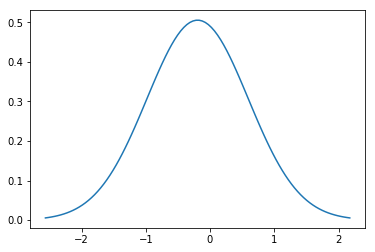

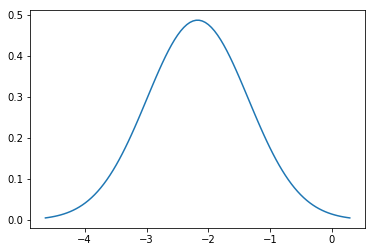

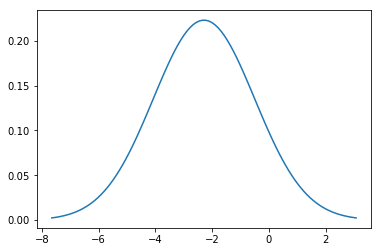

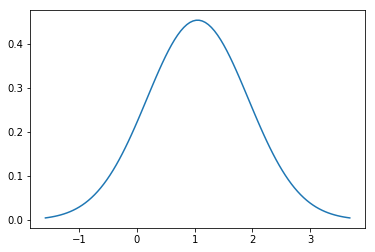

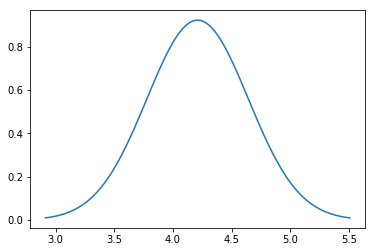

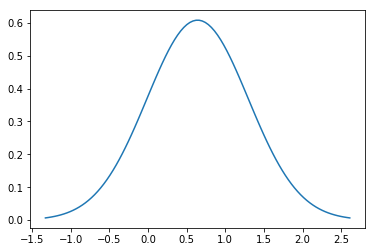

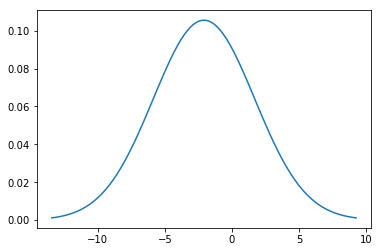

In [68]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math
%matplotlib inline

mu = 13.65072992
variance = 3.58293431
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma))
plt.show()


mu = -5.66968855
variance = 0.42723603
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma))
plt.show()


mu = -1.09093811  
variance = 0.16710773
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma))
plt.show()


mu = -0.19360469  
variance = 0.62315353
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma))
plt.show()


mu = -2.17448038  
variance = 0.67298503
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma))
plt.show()


mu = -2.2885058   
variance = 3.19817485
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma))
plt.show()


mu =  1.05255324  
variance = 0.77264786
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma))
plt.show()


mu = 4.20981991
variance = 0.18693215
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma))
plt.show()


mu = 0.64087652 
variance = 0.43095901
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma))
plt.show()


mu = -2.09070588
variance = 14.27599197
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma))
plt.show()


Task 2
Draw 1,000,000 samples from the normal-inverse-gamma prior above and calculate approximate 95% confidence intervals over the mean and the variance using the samples. You can use the numpy.percentile function for this.

Your confidence intervals should approximately match the intervals [-10, 10] and [0.1, 10].

In [39]:
mean = norminvgamma_rvs(mu_0, nu_0, alpha_0, beta_0, size=100000)
print mean

mean_values = []
variance_values = []
for i in range(100000):
    mean_values.append(mean[i][0])
    variance_values.append(mean[i][1])

[[ 2.30969618  0.8171913 ]
 [-0.41891605  0.30372613]
 [-0.1188226   0.49841153]
 ...
 [ 0.02983872  0.17376713]
 [-4.31316427  3.10744811]
 [ 5.7901719   0.20796433]]


In [40]:

from scipy.stats import sem, t
from scipy import mean
confidence = 0.95
data = mean_values

n = len(data)
m = mean(data)
std_err = sem(data)
h = std_err * t.ppf((1 + confidence) / 2, n - 1)

start = m - h
print start
end = m + h
print end

-0.03426228837886089
0.049714547790217


In [45]:
print np.percentile(mean_values, 0.025)
print np.percentile(mean_values, 0.975)

-80.18823041779277
-15.781218222696527


In [41]:
from scipy.stats import sem, t
from scipy import mean
confidence = 0.95
data = variance_values

n = len(data)
m = mean(data)
std_err = sem(data)
h = std_err * t.ppf((1 + confidence) / 2, n - 1)

start = m - h
print start
end = m + h
print end

2.5306092241824776
4.386583226732689


In [48]:
print np.percentile(variance_values, 0.025)
print np.percentile(variance_values, 0.975)

0.04669824288980042
0.08187843072739845


Task 3
Code the equations for calculating the posterior normal-inverse-gamma hyperparameters from the prior hyperparameters and data.

In [63]:
data = np.array([10,20,30])
mu_0 = 0        # The prior mean is centered around 0.
nu_0 = 0.054    # The smaller nu_0 is, the more uncertain we are about the prior mean.
alpha_0 = 1.12  # alpha and beta govern the marginal prior over the variance.
beta_0 = 0.4
n = len(data)



mu_posterior = nu_0*mu_0 + n*(np.mean(data)) / (nu_0 + n)
nu_posterior = nu_0 + n
alpha_posterior = alpha_0 + n/2

data_ = []
for i in data:
    data_.append((i - np.mean(data))**2)
    
beta_posterior = beta_0 + 1/2* sum(data_)  + (n*nu_0/ (nu_0 + n)) * ((np.mean(data)- mu_0)**2/2)

print mu_posterior
print nu_posterior
print alpha_posterior
print beta_posterior

19.64636542239686
3.054
2.12
11.009037328094303
